### Chebyshev filter design

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:

import numpy as np
from sclibrary import read_csv, get_coordinates
from sclibrary import SCPlot


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, 
             delimeter=delimeter, 
             src_col=src_col, 
             dest_col=dest_col, 
             feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")

# create a plot
scplot = SCPlot(sc, coordinates)

In [3]:
f = np.array([
    0.0323,
    0.4980,
    2.3825,
    0.8799,
    -0.5297,
    -0.5192,
    1.0754,
    0.4732,
    -1.1667,
    0.0922
])

In [4]:
from sclibrary.filters import ChebyshevFilterDesign

filter = ChebyshevFilterDesign(simplicial_complex=sc)
filter.get_ideal_frequency(p_choice="L1L", component="gradient")

array([[ 0.39080614,  0.24947938,  0.00885067, -0.1607015 , -0.1499855 ,
         0.04622507, -0.05588552,  0.22811614,  0.24803026,  0.08823208],
       [ 0.24947938,  0.59431162,  0.0011148 ,  0.25271067, -0.15979707,
        -0.0794724 , -0.16188016,  0.13564375, -0.1082169 ,  0.07549224],
       [ 0.00885067,  0.0011148 ,  0.6488312 ,  0.10376043,  0.12367344,
        -0.20810525, -0.21612519,  0.01488755,  0.20610943, -0.19644898],
       [-0.1607015 ,  0.25271067,  0.10376043,  0.39403743, -0.05830702,
        -0.18869834, -0.04299378, -0.11137748, -0.27434122, -0.09464577],
       [-0.1499855 , -0.15979707,  0.12367344, -0.05830702,  0.64857201,
         0.03030862, -0.21318648, -0.03853712,  0.07316578, -0.03078068],
       [ 0.04622507, -0.0794724 , -0.20810525, -0.18869834,  0.03030862,
         0.5657807 , -0.23307345,  0.27146471, -0.26638349, -0.00769374],
       [-0.05588552, -0.16188016, -0.21612519, -0.04299378, -0.21318648,
        -0.23307345,  0.56254943, -0.08535559

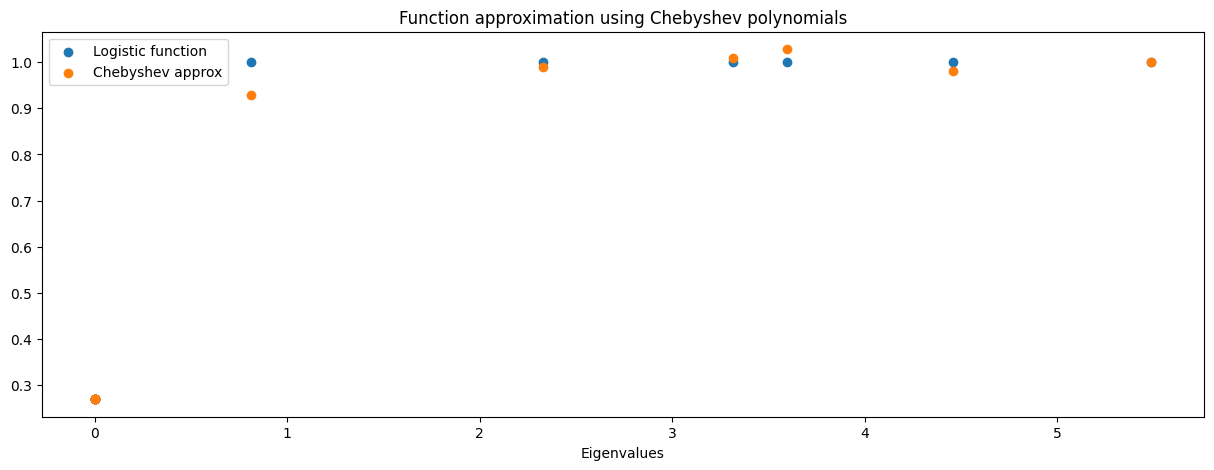

In [5]:
filter.plot_chebyshev_series_approx(p_choice="L1L")

In [7]:
# apply filter
filter.apply(f=f, component="gradient", p_choice="L1L")

Text(0.5, 1.0, 'Error per filter size')

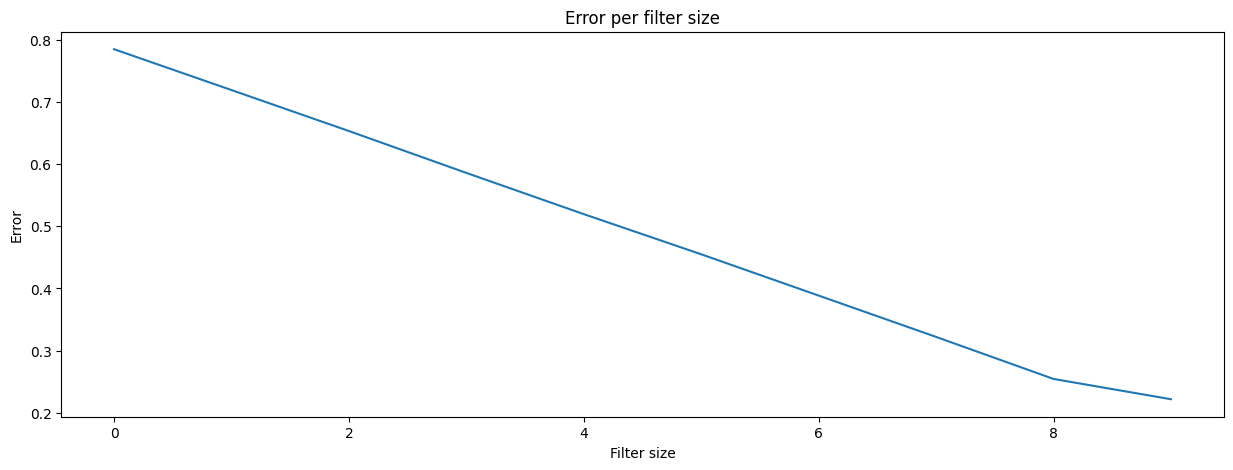

In [8]:
import matplotlib.pyplot as plt

filter_error = filter.history["error_per_filter_size"]

# plot the error
plt.figure(figsize=(15, 5))
plt.plot(filter_error)
plt.xlabel("Filter size")
plt.ylabel("Error")
plt.title("Error per filter size")

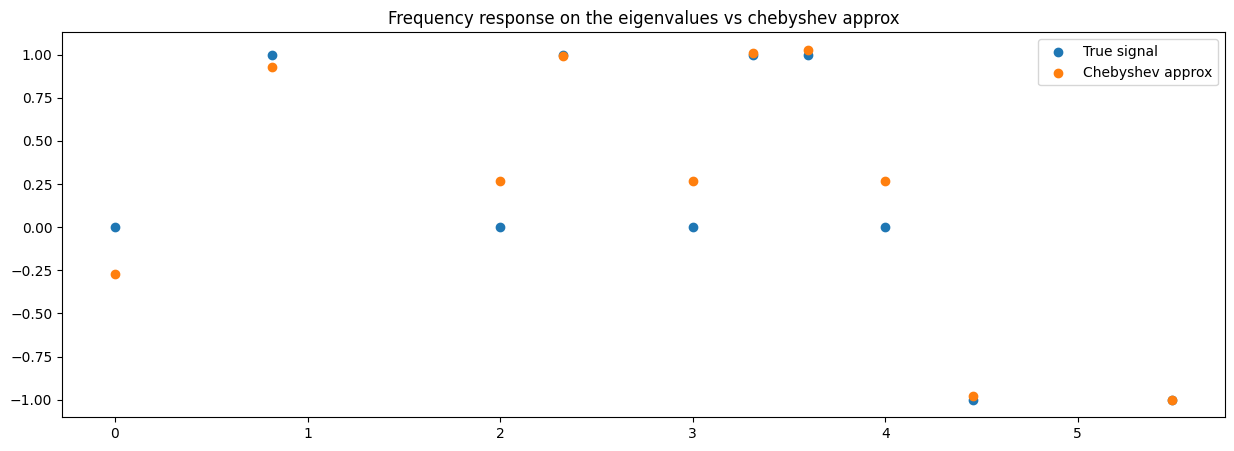

In [9]:
filter.plot_frequency_response_approx(flow=f, component="gradient")

In [10]:
error = filter.history["error_per_filter_size"][-1]
print(f"Error: {error}")

Error: 0.22206574934846793
